In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import sklearn.metrics as sk
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
feature_vector_length = 28*28
num_classes = 10

In [5]:
# Transformar as intensidades dos pixels das imagens em valores reais entre 0 e 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

X_train_vec = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test_vec = X_test.reshape(X_test.shape[0], feature_vector_length)

X_train_CNN = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_CNN = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Convert target classes to categorical ones
Y_train_ohe = to_categorical(Y_train, num_classes)
Y_test_ohe = to_categorical(Y_test, num_classes)

In [6]:
X_train_vec.shape

(60000, 784)

In [8]:
Y_train_ohe.shape

(60000, 10)

Feature shape: (784,)
Epoch 00036: early stopping


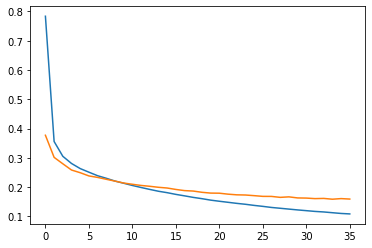

In [44]:
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')
MAXepochs = 100
Ndense = 20
# Create the model
model1 = Sequential()
model1.add(Dense(Ndense, input_shape=input_shape))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
result1 = model1.fit(X_train_vec, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=0, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(result1.history['loss'])
plt.plot(result1.history['val_loss'])

313/313 [==============================] - 0s 738us/step - loss: 0.1593 - accuracy: 0.9546


Text(0.5, 1.0, 'Matriz de confusão da MLP com 1 camada')

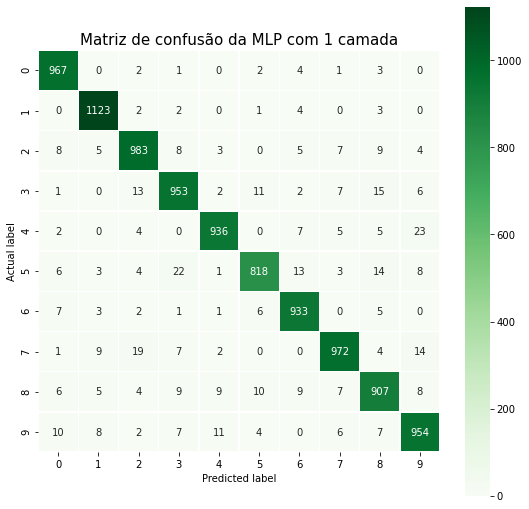

In [45]:
accuracy1 = model1.evaluate(X_test_vec, Y_test_ohe, verbose=1)[1]
Y_pred1 = np.argmax(model1.predict(X_test_vec), axis=-1)
cmatrix1 = sk.confusion_matrix(Y_test,Y_pred1)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão da MLP com 1 camada'
plt.title(all_sample_title, size = 15)

Epoch 00022: early stopping


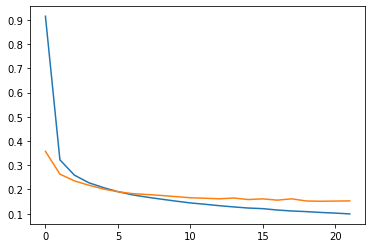

In [47]:
# Create the model
model2 = Sequential()
model2.add(Dense(Ndense, input_shape=input_shape))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(Ndense))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
result2 = model2.fit(X_train_vec, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=0, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(result2.history['loss'])
plt.plot(result2.history['val_loss'])

313/313 [==============================] - 0s 742us/step - loss: 0.1361 - accuracy: 0.9610


Text(0.5, 1.0, 'Matriz de confusão da MLP com 1 camada')

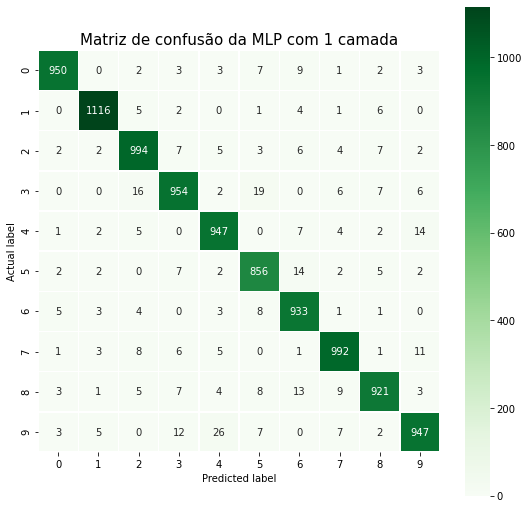

In [48]:
accuracy2 = model2.evaluate(X_test_vec, Y_test_ohe, verbose=1)[1]
Y_pred2 = np.argmax(model2.predict(X_test_vec), axis=-1)
cmatrix2 = sk.confusion_matrix(Y_test,Y_pred2)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão da MLP com 2 camadas'
plt.title(all_sample_title, size = 15)

Epoch 00014: early stopping


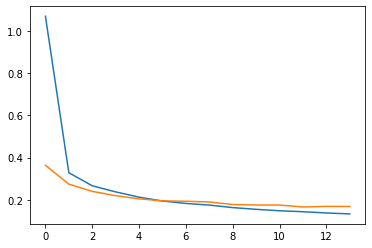

In [49]:
# Create the model
model3 = Sequential()
model3.add(Dense(Ndense, input_shape=input_shape))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(Ndense))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(Ndense))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
result3 = model3.fit(X_train_vec, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=0, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(result3.history['loss'])
plt.plot(result3.history['val_loss'])

313/313 [==============================] - 0s 754us/step - loss: 0.1665 - accuracy: 0.9525


Text(0.5, 1.0, 'Matriz de confusão da MLP com 3 camadas')

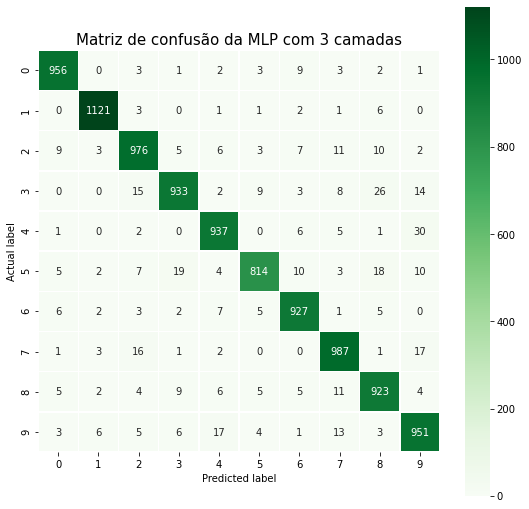

In [50]:
accuracy3 = model3.evaluate(X_test_vec, Y_test_ohe, verbose=1)[1]
Y_pred3 = np.argmax(model3.predict(X_test_vec), axis=-1)
cmatrix3 = sk.confusion_matrix(Y_test,Y_pred3)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão da MLP com 3 camadas'
plt.title(all_sample_title, size = 15)

In [6]:
def define_model_CNN(Nkernels, kernelsize):
	modelCNN = Sequential()
	modelCNN.add(Conv2D(Nkernels, (kernelsize, kernelsize), activation='relu', input_shape=(28, 28, 1)))
	modelCNN.add(MaxPooling2D((2, 2)))
	modelCNN.add(Flatten())
	modelCNN.add(Dense(10, activation='softmax'))
	modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return modelCNN

In [60]:
X_train.shape

(60000, 28, 28)

Epoch 1/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.5111 - accuracy: 0.8690 - val_loss: 0.2409 - val_accuracy: 0.9337
Epoch 2/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.2100 - accuracy: 0.9389 - val_loss: 0.1622 - val_accuracy: 0.9561
Epoch 3/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.1409 - accuracy: 0.9601 - val_loss: 0.1185 - val_accuracy: 0.9691
Epoch 4/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.1060 - accuracy: 0.9704 - val_loss: 0.0995 - val_accuracy: 0.9733
Epoch 5/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.0874 - accuracy: 0.9760 - val_loss: 0.0877 - val_accuracy: 0.9758
Epoch 6/1000
192/192 [==============================] - 5s 25ms/step - loss: 0.0745 - accuracy: 0.9794 - val_loss: 0.0781 - val_accuracy: 0.9785
Epoch 7/1000
192/192 [==============================] - 5s 24ms/step - loss: 0.0667 - accuracy: 0.9817 - val_loss: 0.0746 - val_ac

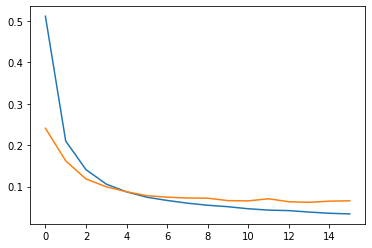

In [8]:
MAXepochs = 1000
modelCNN = define_model_CNN(32, 3)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
resultCNN = modelCNN.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
epoch = list(range(1,MAXepochs + 1))
plt.plot(resultCNN.history['loss'])
plt.plot(resultCNN.history['val_loss'])

In [11]:
Nkernels_vec = (8, 16, 32, 64, 128, 256)
Kernel_dim_default = 3
accuracy_vs_Nkernels = []
for Nkernels in Nkernels_vec:
    modelCNN = define_model_CNN(Nkernels, Kernel_dim_default)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    resultCNN = modelCNN.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
    accuracy = modelCNN.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]
    accuracy_vs_Nkernels.append(accuracy)

Epoch 1/1000
192/192 [==============================] - 3s 13ms/step - loss: 0.7944 - accuracy: 0.8016 - val_loss: 0.3064 - val_accuracy: 0.9145
Epoch 2/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.2789 - accuracy: 0.9196 - val_loss: 0.2262 - val_accuracy: 0.9368
Epoch 3/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.2131 - accuracy: 0.9380 - val_loss: 0.1836 - val_accuracy: 0.9503
Epoch 4/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.1745 - accuracy: 0.9495 - val_loss: 0.1548 - val_accuracy: 0.9582
Epoch 5/1000
192/192 [==============================] - 3s 13ms/step - loss: 0.1462 - accuracy: 0.9581 - val_loss: 0.1344 - val_accuracy: 0.9641
Epoch 6/1000
192/192 [==============================] - 3s 13ms/step - loss: 0.1269 - accuracy: 0.9636 - val_loss: 0.1208 - val_accuracy: 0.9675
Epoch 7/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.1127 - accuracy: 0.9679 - val_loss: 0.1112 - val_ac

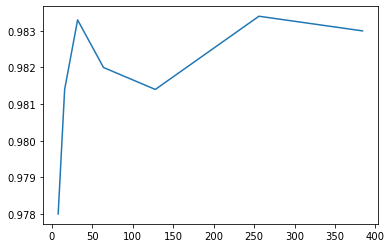

In [16]:
plt.plot(Nkernels_vec,accuracy_vec)

In [ ]:
Kernel_dim_vec = (2, 3, 4, 5, 6, 7, 8)
Nkernels_default = 32
accuracy_vs_kerneldim = []
for Kernel_dim in Kernel_dim_vec:
    modelCNN = define_model_CNN(Nkernels_default, Kernel_dim)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    resultCNN = modelCNN.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
    accuracy = modelCNN.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]
    accuracy_vs_kerneldim.append(accuracy)

In [ ]:
plt.plot(Kernel_dim_vec,accuracy_vs_kerneldim)

In [ ]:
best_Nkernels = Nkernels_vec[np.array(accuracy_vs_Nkernels).argmin()]
best_Kernel_dim = Kernel_dim_vec[np.array(accuracy_vs_kerneldim).argmin()]

In [ ]:
modelCNN_final = define_model_CNN(best_Nkernels, best_Kernel_dim)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
resultCNN_final = modelCNN_final.fit(X_train_CNN, Y_train_ohe, epochs=MAXepochs, batch_size=250, verbose=1, validation_split=0.2, callbacks=[es])
accuracy = modelCNN_final.evaluate(X_test_CNN, Y_test_ohe, verbose=1)[1]

In [ ]:
accuracyCNN = modelCNN_final.evaluate(X_test_vec, Y_test_ohe, verbose=1)[1]
Y_pred_CNN = np.argmax(model3.predict(X_test_vec), axis=-1)
cmatrixCNN_final = sk.confusion_matrix(Y_test,Y_pred3)
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão da MLP com 3 camadas'
plt.title(all_sample_title, size = 15)

In [ ]:
modelCNN = Sequential()
modelCNN.add(Conv2D(best_Nkernels, (best_Kernel_dim, best_Kernel_dim), activation='relu', input_shape=(28, 28, 1)))
modelCNN.add(MaxPooling2D((2, 2)))
modelCNN.add(Conv2D(best_Nkernels, (best_Kernel_dim, best_Kernel_dim), activation='relu'))
modelCNN.add(MaxPooling2D((2, 2)))
modelCNN.add(Flatten())
modelCNN.add(Dense(100, activation='relu'))
modelCNN.add(Dense(10, activation='softmax'))
modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])